# **Step 1: Load Dataset**

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/MERGE_DATASET.xlsx', sheet_name='Sheet1')

# Display the first few rows
df.head()

,Date,Year,Day,Month,Season,Weather,SolarRadiation(ALLSKY_SFC_SW_DWN),Temperature(T2M),Humidity(RH2M),Precipitation,Wind(WS10M),ProductionToday(kWh),AnticipatedYield(INR)
0,2023-02-15 00:00:00,2023,Wednesday,February,Winter,cloudy,6.93,26.48,52.54,0.0,1.53,0.06,0.21
1,2023-02-16 00:00:00,2023,Thursday,February,Winter,clear,6.91,26.12,48.98,0.0,2.10,0.00,0.00
2,2023-02-17 00:00:00,2023,Friday,February,Winter,clear,6.95,26.34,48.52,0.0,2.17,0.00,0.00
3,2023-02-18 00:00:00,2023,Saturday,February,Winter,cloudy,6.73,26.02,55.02,0.0,1.76,0.00,0.00
4,2023-02-19 00:00:00,2023,Sunday,February,Winter,cloudy,6.44,26.67,57.34,0.0,1.40,0.00,0.00


# **Step 2: Data Cleaning and Preprocessing**

In [ ]:
# # Load your Excel file
# df = pd.read_excel("MERGE DATASET (solar and nasa).xlsx")

# # Function to classify weather realistically for Malappuram
# def classify_weather(row):
#     temp = row['Temperature(T2M)']
#     humidity = row['Humidity(RH2M)']
#     solar = row['SolarRadiation(ALLSKY_SFC_SW_DWN)']
#     precip = row['Precipitation']
#     wind = row['Wind(WS10M)']

#     # Realistic, location-specific weather logic:
#     if precip > 0.2:
#         return 'rainy'
#     elif solar < 4 and humidity > 85 and temp < 26:
#         return 'foggy'
#     elif humidity >= 75:
#         return 'humid'
#     elif temp >= 30 and solar > 6:
#         return 'hot & sunny'
#     elif temp < 25:
#         return 'cool'
#     elif 3 <= solar <= 5.5 and 60 <= humidity <= 75:
#         return 'cloudy'
#     elif wind > 2.5:
#         return 'windy'
#     elif humidity < 50 and solar > 5.5:
#         return 'clear'
#     else:
#         return 'cloudy'  # Default fallback

# # Apply classification to each row
# df['Weather'] = df.apply(classify_weather, axis=1)

# # Save to new Excel file
# df.to_excel("MERGE_DATASET_with_weather.xlsx", index=False)

# # Show preview
# print(df[['Date', 'Temperature(T2M)', 'Humidity(RH2M)', 'SolarRadiation(ALLSKY_SFC_SW_DWN)',
#           'Precipitation', 'Wind(WS10M)', 'Weather']].head(10))



In [ ]:
# Load the Excel file
df = pd.read_excel("MERGE_DATASET.xlsx")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Check missing values before cleaning
print("Missing values before cleaning:")
print(df.isna().sum())

# Standardize categorical text fields
text_columns = ['Day', 'Month', 'Season', 'Weather']
for col in text_columns:
    df[col] = df[col].str.strip().str.title()

# Replace -999 with NaN (so it can be interpolated)
df.replace(-999, pd.NA, inplace=True)

# Interpolate to fill missing and -999 areas
df.interpolate(method='linear', inplace=True)

# For any missing value
df.fillna(method='bfill', inplace=True)  # backward fill for start
df.fillna(method='ffill', inplace=True)  # forward fill for end

# Drop duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)


# Detect outliers using IQR method and flag them
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[column] < lower_bound) | (data[column] > upper_bound))

# Apply outlier detection to selected columns
num_cols = ['SolarRadiation(ALLSKY_SFC_SW_DWN)', 'ProductionToday(kWh)']
for col in num_cols:
    outlier_flag_col = f"{col}_Outlier"
    df[outlier_flag_col] = detect_outliers_iqr(df, col)

# Summary after cleaning
print("\nMissing values after cleaning:")
print(df.isna().sum())

# Save cleaned dataset
df.to_excel("MERGE_DATASET_CLEANED.xlsx", index=False)


Missing values before cleaning:
Date                                 0
Year                                 0
Day                                  0
Month                                0
Season                               0
Weather                              0
SolarRadiation(ALLSKY_SFC_SW_DWN)    0
Temperature(T2M)                     0
Humidity(RH2M)                       0
Precipitation                        0
Wind(WS10M)                          0
ProductionToday(kWh)                 3
AnticipatedYield(INR)                3
dtype: int64

Missing values after cleaning:
Date                                         0
Year                                         0
Day                                          0
Month                                        0
Season                                       0
Weather                                      0
SolarRadiation(ALLSKY_SFC_SW_DWN)            0
Temperature(T2M)                             0
Humidity(RH2M)                          

<ipython-input-2-3596927483>:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
<ipython-input-2-3596927483>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # backward fill for start
<ipython-input-2-3596927483>:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(method='bfill', inplace=True)  # backward fill for start
<ipython-input-2-3596927483>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() 

In [ ]:
# Summary Statistics
df.describe()

,Year,SolarRadiation(ALLSKY_SFC_SW_DWN),Temperature(T2M),Humidity(RH2M),Precipitation,Wind(WS10M),ProductionToday(kWh),AnticipatedYield(INR)
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,2023.750000,5.154813,26.062688,77.410875,4.804000,2.098488,9.708900,33.983619
std,0.698649,1.240319,1.944712,13.374271,7.754583,0.690878,3.099486,10.848215
min,2023.000000,1.220000,22.360000,31.630000,0.000000,0.670000,0.000000,0.000000
25%,2023.000000,4.260000,24.625000,67.592500,0.060000,1.560000,8.245000,28.862500
50%,2024.000000,5.215000,25.425000,82.835000,1.890000,2.020000,10.155000,35.545000
75%,2024.000000,6.070000,27.522500,88.132500,6.225000,2.532500,11.692500,40.927500
max,2025.000000,7.720000,31.810000,95.760000,65.430000,5.270000,19.790000,69.270000


# **Step 3: Exploratory Data Analysis (EDA)**

A. Time-Series Visualizations
1. Interactive Time Series Dashboard

In [ ]:
import plotly.express as px
fig = px.line(df, x='Date', y=['SolarRadiation(ALLSKY_SFC_SW_DWN)', 'ProductionToday(kWh)'],
              color_discrete_sequence=['red', 'blue'])
fig.update_layout(title="Solar Radiation vs Production Over Time")
fig.show()


2 a. Average Energy Production by Season

<ipython-input-7-3253530160>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




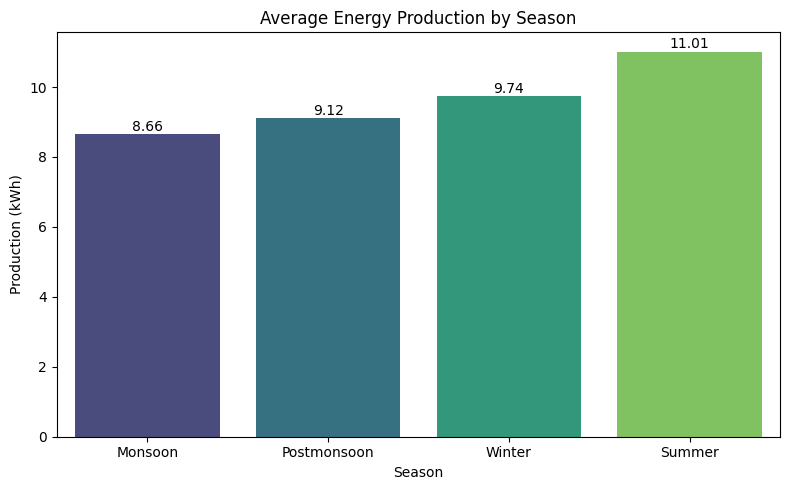

In [ ]:
season_avg_prod = df.groupby('Season')['ProductionToday(kWh)'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=season_avg_prod.index, y=season_avg_prod.values, palette='viridis')
plt.title('Average Energy Production by Season')
plt.ylabel('Production (kWh)')
plt.xlabel('Season')

# Add labels on bars
for i, val in enumerate(season_avg_prod.values):
    plt.text(i, val + 0.01, round(val, 2), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


2 b. Seasonal Box Plots of Radiation & *Production*

<ipython-input-8-93620895>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




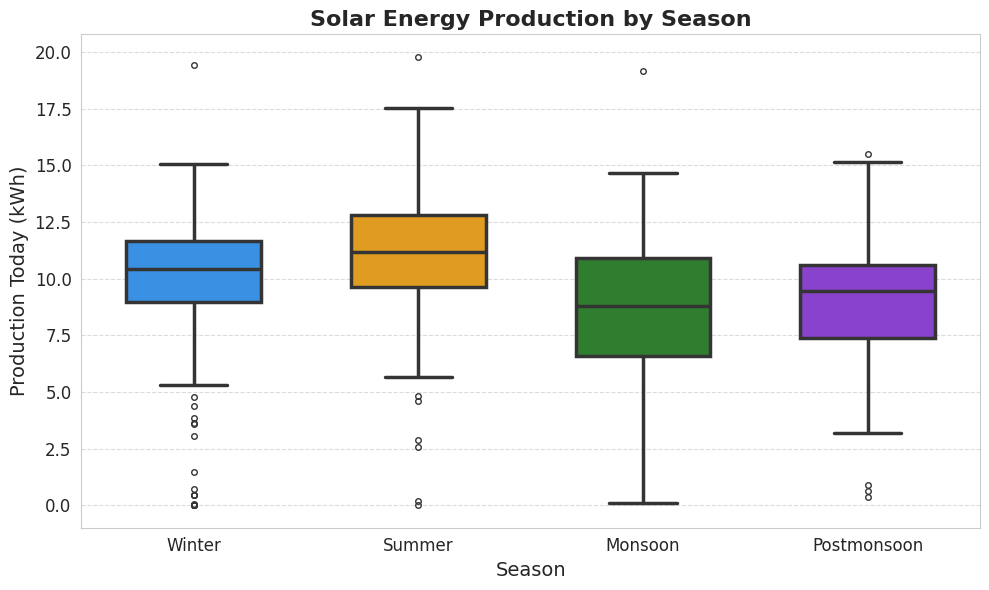

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style and font
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Define color palette matching the IPYNB theme
season_palette = {
    'Summer': '#FFA500',     # Orange
    'Winter': '#1E90FF',     # Dodger Blue
    'Monsoon': '#228B22',    # Forest Green
    'Postmonsoon': '#8A2BE2' # Blue Violet
}

# Create the boxplot with custom colors
sns.boxplot(
    x='Season',
    y='ProductionToday(kWh)',
    data=df,
    palette=season_palette,
    linewidth=2.5,
    width=0.6,
    fliersize=4
)

# Enhancements: Title, labels, and font size
plt.title('Solar Energy Production by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Production Today (kWh)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

3. Humidity vs. Solar Production Over Time: Dual-Axis Climate Factor Impact Plots

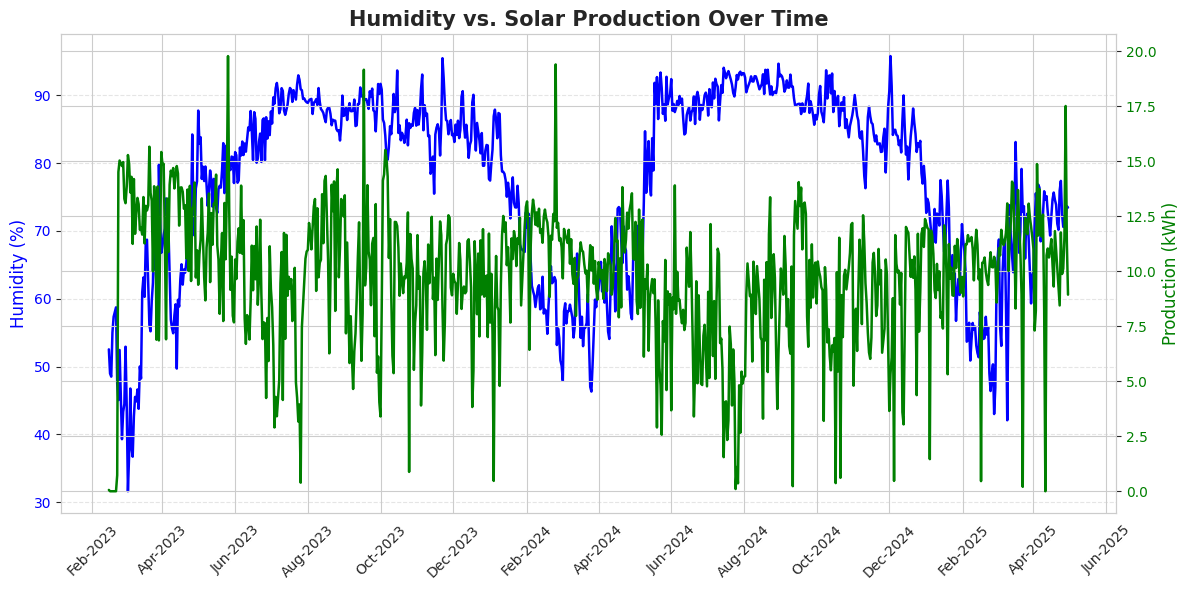

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Humidity on left y-axis
ax1.plot(df['Date'], df['Humidity(RH2M)'], color='blue', linewidth=1.8, label='Humidity (RH2M)')
ax1.set_ylabel('Humidity (%)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Format x-axis to improve readability
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45, fontsize=10)

# Plot Production on right y-axis
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['ProductionToday(kWh)'], color='green', linewidth=1.8, label='Production Today (kWh)')
ax2.set_ylabel('Production (kWh)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('Humidity vs. Solar Production Over Time', fontsize=15, fontweight='bold')
fig.tight_layout()
plt.show()


4. Correlation Between Climate Factors & Solar Irradiance

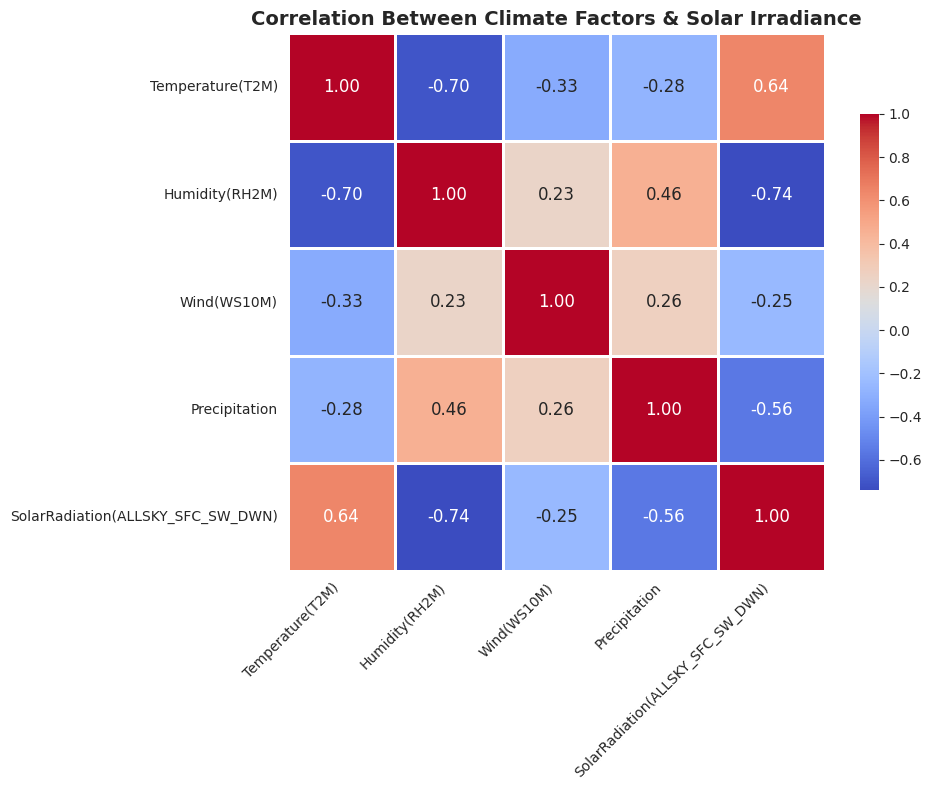

In [ ]:
# Select relevant climate and solar columns (original column names)
climate_cols = [
    'Temperature(T2M)',
    'Humidity(RH2M)',
    'Wind(WS10M)',
    'Precipitation',
    'SolarRadiation(ALLSKY_SFC_SW_DWN)'
]

# Compute correlation
corr = df[climate_cols].corr().round(2)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=1,
    square=True,
    fmt=".2f",
    annot_kws={"size": 12},
    cbar_kws={'shrink': 0.7}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Between Climate Factors & Solar Irradiance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



5 a. Solar Irradiance vs Energy Production with seaons on yearly basis

<ipython-input-12-686318702>:82: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-12-686318702>:82: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-12-686318702>:82: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



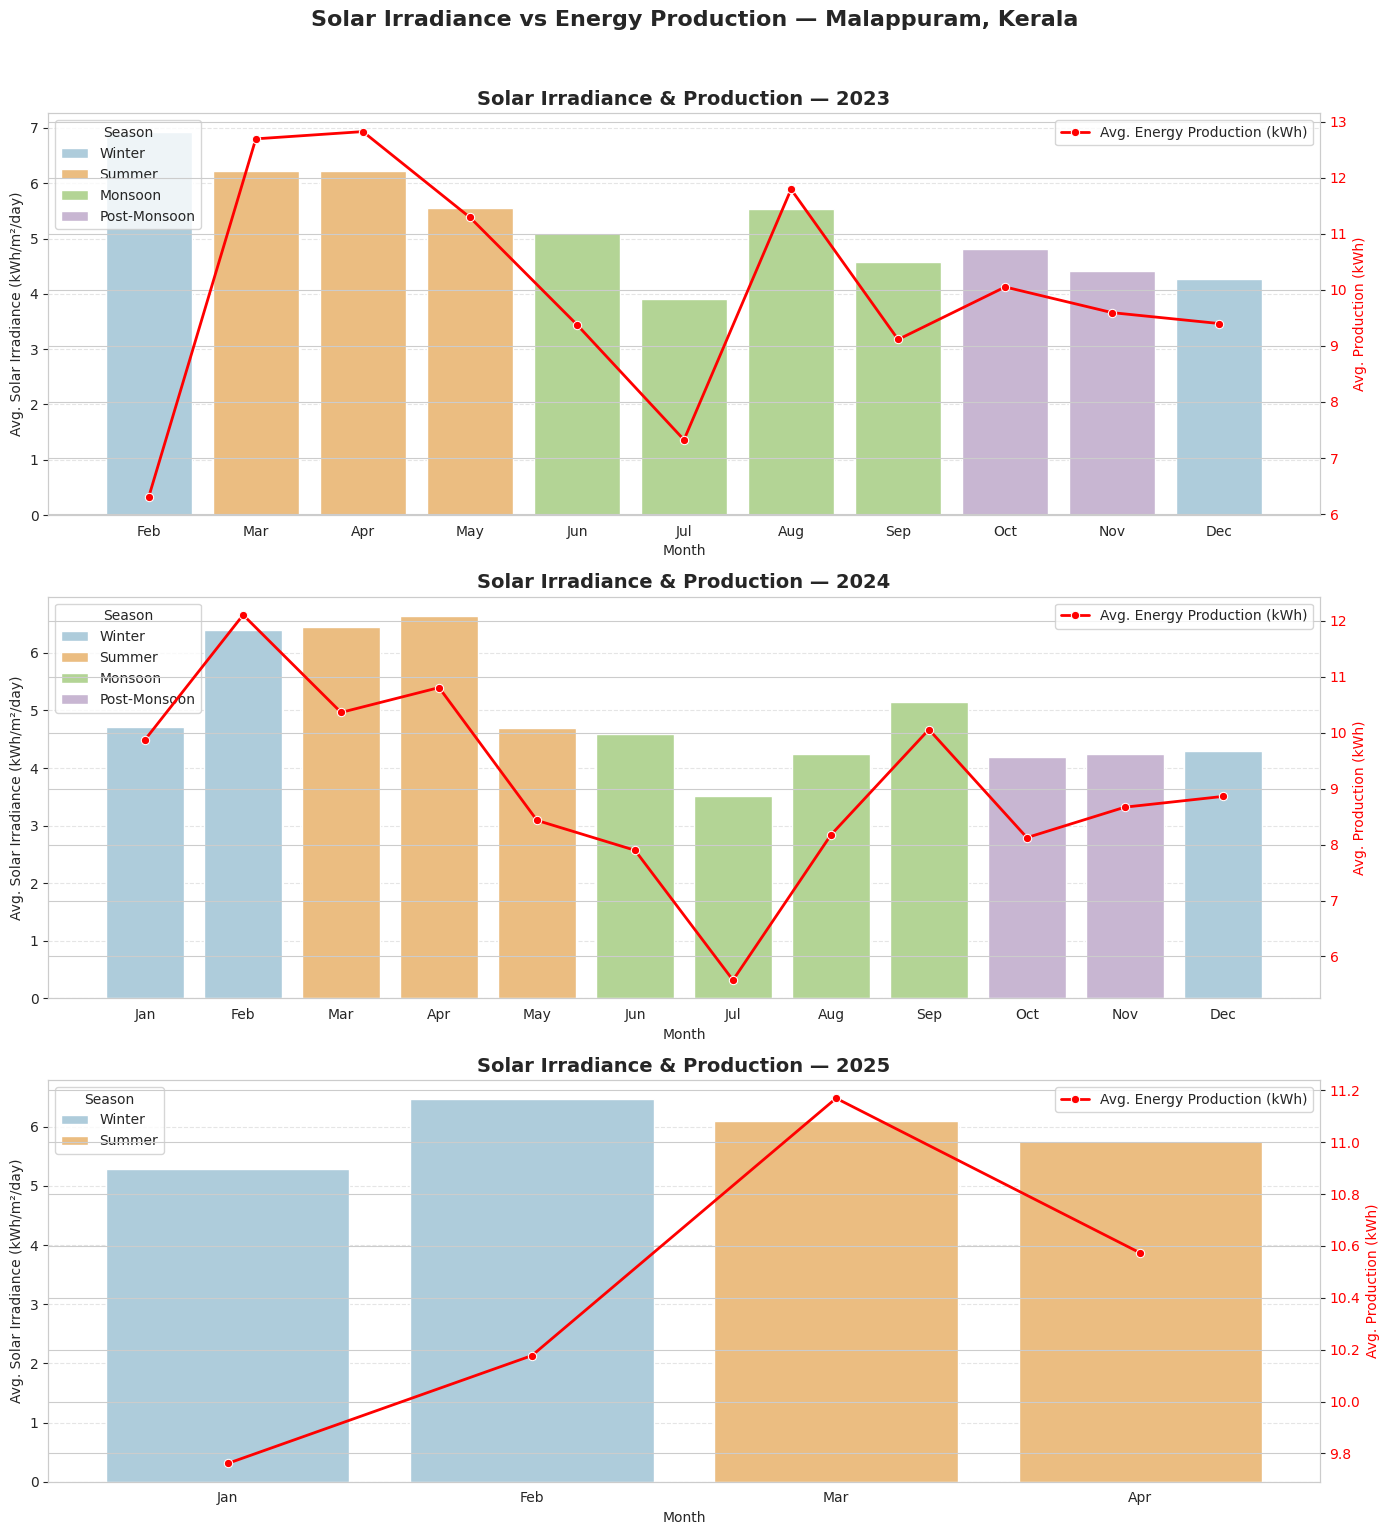

In [ ]:
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract time features
df['Month'] = df['Date'].dt.strftime('%b')
df['Month_Num'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Clean and map season names
df['Season'] = df['Season'].str.strip().str.title()
season_mapping = {
    'Winter': 'Winter',
    'Summer': 'Summer',
    'Monsoon': 'Monsoon',
    'Postmonsoon': 'Post-Monsoon',
    'Post-Monsoon': 'Post-Monsoon'
}
df['Season'] = df['Season'].map(season_mapping)

# Monthly averages
monthly_avg = df.groupby(['Year', 'Month_Num', 'Month', 'Season']).agg({
    'SolarRadiation(ALLSKY_SFC_SW_DWN)': 'mean',
    'ProductionToday(kWh)': 'mean'
}).reset_index()

# Sort months in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values(['Year', 'Month_Num'])

# Season color mapping
season_colors = {
    'Winter': '#A6CEE3',
    'Summer': '#FDBF6F',
    'Monsoon': '#B2DF8A',
    'Post-Monsoon': '#CAB2D6'
}

# Create subplots for each year
years = monthly_avg['Year'].unique()
fig, axes = plt.subplots(nrows=len(years), figsize=(14, 5 * len(years)), sharex=False)

if len(years) == 1:
    axes = [axes]

for ax, year in zip(axes, years):
    data = monthly_avg[monthly_avg['Year'] == year]

    # Barplot (Solar Irradiance)
    bars = sns.barplot(
        data=data,
        x='Month',
        y='SolarRadiation(ALLSKY_SFC_SW_DWN)',
        hue='Season',
        palette=season_colors,
        dodge=False,
        ax=ax
    )

    # Twin axis for energy production
    ax2 = ax.twinx()
    sns.lineplot(
        data=data,
        x='Month',
        y='ProductionToday(kWh)',
        color='red',
        marker='o',
        linewidth=2,
        ax=ax2,
        label='Avg. Energy Production (kWh)'
    )

    # Titles and labels
    ax.set_title(f"Solar Irradiance & Production — {year}", fontsize=14, weight='bold')
    ax.set_ylabel("Avg. Solar Irradiance (kWh/m²/day)")
    ax.set_xlabel("Month")
    ax2.set_ylabel("Avg. Production (kWh)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Axis tweaks
    ax.set_xticklabels(month_order, rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend(title='Season', loc='upper left')
    ax2.legend(loc='upper right')

plt.suptitle("Solar Irradiance vs Energy Production — Malappuram, Kerala", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()



**According to the India Meteorological Department (IMD) — which is the official standard — the seasons in Kerala are:**

| **Season**                           | **Months**              |
| :----------------------------------- | :---------------------- |
| **Winter**                           | **December – February** |
| **Summer (Pre-monsoon)**             | **March – May**         |
| **Southwest Monsoon**                | **June – September**    |
| **Northeast Monsoon (Post-monsoon)** | **October – November**  |


---



**So to Summarize:**

In Malappuram, Kerala — **February tends to have higher solar radiation than Summer (March–May)** because of clearer, drier skies and minimal cloud cover in the late winter season, while increasing humidity and pre-monsoon cloud formation in summer reduces effective irradiance despite higher sun angles.


---



**1. Summary of above graph:**

Each subplot corresponds to a year:

* **Bar plots**: Show average solar irradiance (in kWh/m²/day) — how much sunlight was available.
* **Red line plots**: Show average energy production per day (in kWh) — how much energy your solar panels generated.

The bars are color-coded by season:

- Winter (light blue)
- Summer (orange)
- Monsoon (green)
- Post-Monsoon (lavender)



---



| **Year** | **Month(s)** | **Observation**                                              | **Irradiance Trend** | **Production Trend** | **Possible Reason**                         |
| -------- | ------------ | ------------------------------------------------------------ | -------------------- | -------------------- | ------------------------------------------- |
| 2023     | Mar–May      | High irradiance, rising production                           | High                 | High                 | Clear skies, strong sunlight                |
|          | Jun–Jul      | Sharp drop in both irradiance and production                 | Significant decline  | Sharp decline        | Monsoon — cloud cover & rain                |
|          | Aug          | Irradiance improves slightly, production recovers moderately | Slight increase      | Partial recovery     | Intermittent monsoon activity               |
|          | Oct–Dec      | Stable production despite lower irradiance                   | Moderate/declining   | Steady               | Post-monsoon and winter — stable sunlight   |
| 2024     | Jan–Feb      | Rising irradiance and production                             | Increasing           | Increasing           | Clear winter skies                          |
|          | Mar–Apr      | Peak irradiance and strong production                        | High                 | High                 | Ideal conditions                            |
|          | May–Jul      | Drop in both metrics; July hits lowest point                 | Low                  | Very low             | Peak monsoon season                         |
|          | Aug–Sep      | Irradiance improves; production recovers accordingly         | Increasing           | Recovering           | Monsoon weakening                           |
|          | Oct–Dec      | Stable phase with balanced irradiance and production         | Stable/declining     | Stable               | Post-monsoon and early winter               |
| 2025     | Jan–Feb      | Steady rise in irradiance and production                     | Moderate → High      | Moderate → High      | Clear winter transition to summer           |
|          | Mar          | Highest production aligned with highest irradiance           | Peak                 | Peak                 | Optimal sunlight and clear skies            |
|          | Apr          | Slight dip in production despite good irradiance             | High                 | Slight decrease      | Possible heat derating or dust accumulation |


---



**2. The deep dips in the red line (average energy production) on your plots, particularly around June–July each year, can be clearly explained by:**

**🌧️ Monsoon Season Impact (June–July)**
* These months coincide with the monsoon season in Kerala, which brings:

  - Heavy cloud cover
  - Reduced sunlight availability
  - Frequent rain, leading to lower solar irradiance

* This significantly reduces both:

  - Avg. Solar Irradiance — drops to ~3.9–5.1 kWh/m²/day in July–August
  - Avg. Energy Production — reaches the lowest values of ~5.6–7.3 kWh in July (2023: 7.3 kWh, 2024: 5.6 kWh)

These dips are **not anomalies or outliers**, but genuine seasonal effects due to **reduced solar input during the monsoon months**.



---


**3. Energy Consumption Planning Insights Table using Solar Panel and NASA data:**

| **Month**   | **Season**   | **Solar Irradiance** | **Solar Production** | **Energy Usage Recommendation**                                 | **Reasoning**                                                        |
| ----------- | ------------ | -------------------- | -------------------- | --------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Jan–Feb** | Winter       | Moderate to High     | Moderate             | ✅ **Safe for medium to high usage**                             | Consistent solar production supports typical household load          |
| **Mar–Apr** | Summer       | High                 | High                 | ✅✅ **Best time for high energy use** (AC, washing, EV charging) | Peak irradiance & production — ideal for heavy consumption           |
| **May**     | Summer       | Slight drop          | Noticeable dip       | ⚠️ **Moderate usage recommended**                               | Production slightly drops — caution for full-day heavy load          |
| **Jun–Jul** | Monsoon      | Low                  | Sharp dip            | ❌ **Avoid heavy consumption** (or expect grid usage)            | Very low production — high grid dependency likely                    |
| **Aug**     | Monsoon      | Recovery             | Inconsistent         | ⚠️ **Light to moderate usage**                                  | Production recovering but unstable due to weather                    |
| **Sep–Oct** | Post-Monsoon | Moderate             | Moderate             | ✅ **Good for regular use**                                      | Stable production, better than monsoon — safe for routine appliances |
| **Nov–Dec** | Winter       | Moderate             | Moderate             | ✅ **Safe for average use**                                      | Solar production is consistent — ideal for low to moderate loads     |


---



5 b. Radiation-Production 3D Scatter  plot

In [ ]:
import plotly.graph_objs as go

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['SolarRadiation(ALLSKY_SFC_SW_DWN)'],
    y=df['Temperature(T2M)'],
    z=df['ProductionToday(kWh)'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Humidity(RH2M)'],         # Color by humidity
        colorscale='Viridis',
        colorbar=dict(title='Humidity (%)'),
        opacity=0.85,
        line=dict(width=0.5, color='DarkSlateGrey')
    )
)])

# Customize layout
fig.update_layout(
    title=dict(
        text='3D Relationship: Solar Radiation vs Temperature vs Production',
        font=dict(size=18, family='Arial', color='black'),
        x=0.5
    ),
    scene=dict(
        xaxis=dict(title='Solar Radiation (W/m²)', backgroundcolor='white'),
        yaxis=dict(title='Temperature (°C)', backgroundcolor='white'),
        zaxis=dict(title='Production Today (kWh)', backgroundcolor='white'),
    ),
    margin=dict(l=10, r=10, b=10, t=40),
    height=650,
    paper_bgcolor='rgba(245,245,245,1)',
    scene_bgcolor='rgba(250,250,250,1)'
)

fig.show()




---


# **Step 4: Future Forcasting using modeltraining method**

Arima


Training ARIMAX model on 'ProductionToday(kWh)' with exogenous features...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.




ARIMAX Forecast for ProductionToday(kWh)
RMSE: 3.077
MAE: 1.940


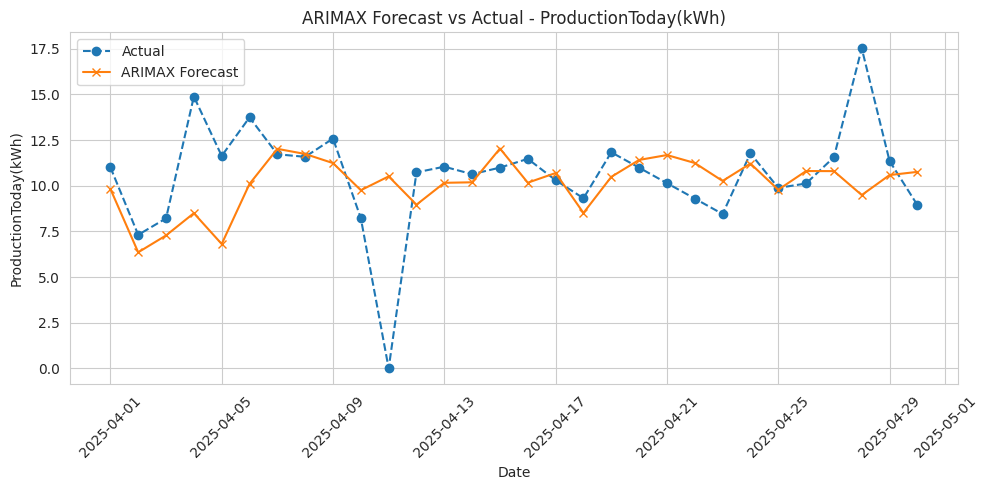

In [ ]:
# 1. Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reproducibility: By setting the seed, it ensure that these operations produce the same result every time when run the code.
#(seed ensures that model training and forecasts are repeatable)
np.random.seed(42)   # Will always produce the same result and 42 is random number


# 2. Load and prepare dataset
df = pd.read_excel("MERGE_DATASET_CLEANED.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


# 3. Select Target and Featuress
# Define the target variable (what we're forecasting) and the exogenous features (external predictors).
target_col = 'ProductionToday(kWh)'
feature_cols = [
    'SolarRadiation(ALLSKY_SFC_SW_DWN)',
    'Temperature(T2M)',
    'Humidity(RH2M)',
    'Precipitation',
    'Wind(WS10M)'
]


# 4. Train-Test Split
# Split the data into: a. Training set: All data before April 1, 2025.
#                      b. Test set: All data from April 1, 2025 onwards.
train_end = '2025-04-01'
train = df[df.index < train_end]
test = df[df.index >= train_end]


# 5. Feature Scaling (Standardization)
# Standardize (z-score normalize) the exogenous features for both training and testing.
# This is essential for stable performance in models like ARIMAX when using numerical predictors.
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[feature_cols])
test_scaled = scaler.transform(test[feature_cols])


# 6. Fit ARIMAX model (SARIMAX): ARIMAX = ARIMA + eXogenous variables
print(f"\nTraining ARIMAX model on '{target_col}' with exogenous features...")

model = SARIMAX(train[target_col], exog=train_scaled, order=(5, 1, 1))
results = model.fit(disp=False)

# 7. Forecast
forecast = results.forecast(steps=len(test), exog=test_scaled)


# Evaluation
rmse = np.sqrt(mean_squared_error(test[target_col], forecast))
mae = mean_absolute_error(test[target_col], forecast)

print(f"\nARIMAX Forecast for {target_col}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")


# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test[target_col], label="Actual", linestyle='--', marker='o')
plt.plot(test.index, forecast, label="ARIMAX Forecast", linestyle='-', marker='x')
plt.xlabel("Date")
plt.ylabel(target_col)
plt.xticks(rotation=45)
plt.title(f"ARIMAX Forecast vs Actual - {target_col}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **PROPHET**

<ipython-input-15-2502621626>:22: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm0oxbhfa/r7nk2bnk.json


Training Prophet model for target: ProductionToday(kWh)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpm0oxbhfa/agps1azc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56801', 'data', 'file=/tmp/tmpm0oxbhfa/r7nk2bnk.json', 'init=/tmp/tmpm0oxbhfa/agps1azc.json', 'output', 'file=/tmp/tmpm0oxbhfa/prophet_modelywsd_6uo/prophet_model-20250613175158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet with Regressors Forecast for ProductionToday(kWh)
RMSE: 3.209
MAE: 2.031


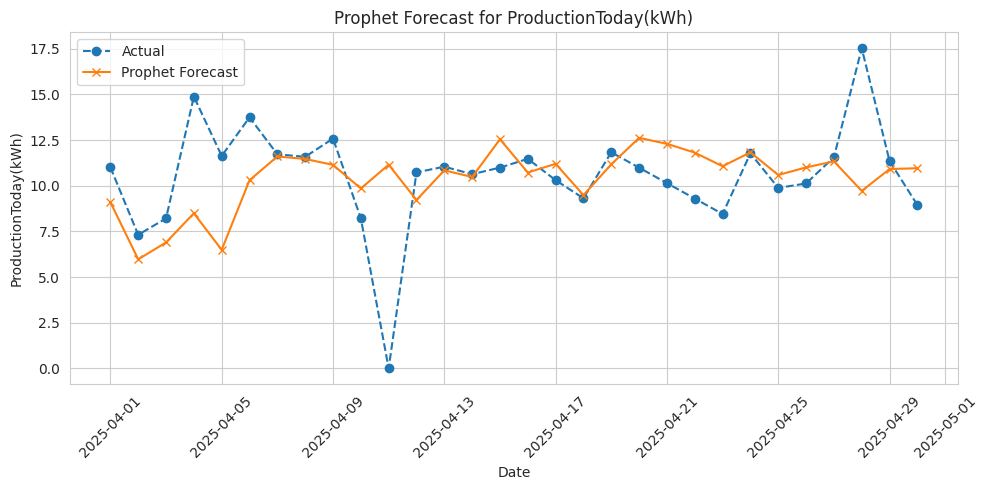

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare dataset
df = pd.read_excel("MERGE_DATASET_CLEANED.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define target and feature columns
target_col = 'ProductionToday(kWh)'
feature_cols = [
    'SolarRadiation(ALLSKY_SFC_SW_DWN)', 'Temperature(T2M)',
    'Humidity(RH2M)', 'Precipitation', 'Wind(WS10M)'
]

# Prepare Prophet-compatible DataFrame with regressors
prophet_df = df[[target_col] + feature_cols].reset_index()
prophet_df.rename(columns={'Date': 'ds', target_col: 'y'}, inplace=True)
prophet_df.fillna(method='ffill', inplace=True)  # Fill missing values forward

# Train-test split by date
train_data = prophet_df[prophet_df['ds'] < '2025-04-01'].copy()
test_data = prophet_df[prophet_df['ds'] >= '2025-04-01'].copy()

# Initialize Prophet model with external regressors
print(f"Training Prophet model for target: {target_col}")
model = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=True,
    daily_seasonality=True
)

# Add external regressors to the model
for feature in feature_cols:
    model.add_regressor(feature)

# Fit model on training data
model.fit(train_data)

# Prepare future DataFrame including regressors for test period
future = test_data[['ds'] + feature_cols]

# Make forecast
forecast = model.predict(future)

# Evaluate forecast accuracy
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast['yhat']))
mae = mean_absolute_error(test_data['y'], forecast['yhat'])

print(f"\nProphet with Regressors Forecast for {target_col}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(test_data['ds'], test_data['y'], label="Actual", linestyle='dashed', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label="Prophet Forecast", marker='x')
plt.xlabel("Date")
plt.ylabel(target_col)
plt.title(f"Prophet Forecast for {target_col}")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **LSTM**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step

Multivariate LSTM Forecast for ProductionToday(kWh)
RMSE: 2.825
MAE: 2.021


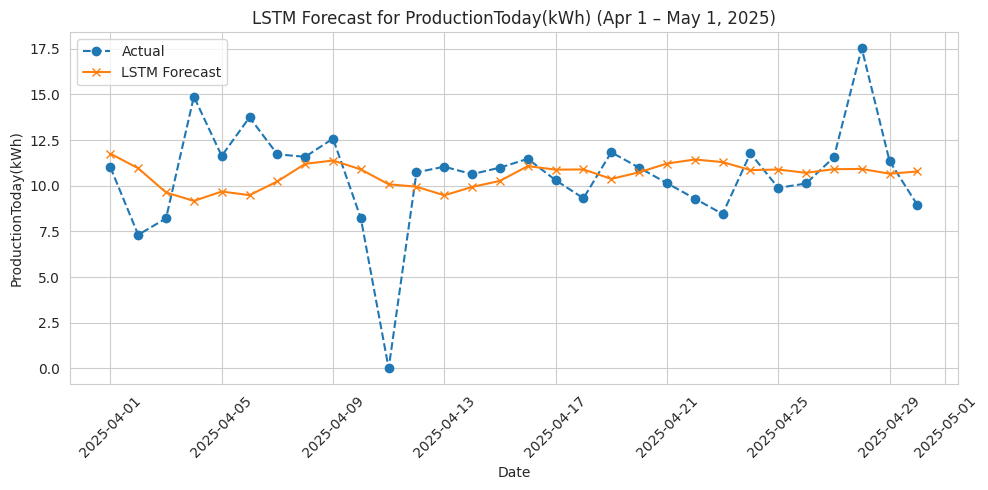

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Load and prepare dataset
df = pd.read_excel("MERGE_DATASET_CLEANED.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define target and features
target_col = 'ProductionToday(kWh)'
feature_cols = [
    'SolarRadiation(ALLSKY_SFC_SW_DWN)', 'Temperature(T2M)', 'Humidity(RH2M)',
    'Precipitation', 'Wind(WS10M)'
]

# Ensure all data is numeric and drop rows with missing values
df[feature_cols + [target_col]] = df[feature_cols + [target_col]].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=feature_cols + [target_col], inplace=True)

# Sequence length for LSTM input
SEQUENCE_LENGTH = 30

# Normalize features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(df[feature_cols])
scaled_target = target_scaler.fit_transform(df[[target_col]])

# Combine scaled features and target for sequence creation
data_combined = np.hstack((scaled_features, scaled_target))

# Create sequences
def create_multivariate_sequences(data, seq_length=SEQUENCE_LENGTH, target_index=-1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # all features
        y.append(data[i+seq_length, target_index])  # target
    return np.array(X), np.array(y)

X, y = create_multivariate_sequences(data_combined)

# Train-test split (85% train, 15% test)
train_size = int(len(X) * 0.85)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(80, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Forecast
pred_scaled = model.predict(X_test)
pred = target_scaler.inverse_transform(pred_scaled)
actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
rmse = np.sqrt(mean_squared_error(actual, pred))
mae = mean_absolute_error(actual, pred)
print(f"\nMultivariate LSTM Forecast for {target_col}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Recreate the correct date range for the test set
test_dates = df.index[-len(actual):]  # this ensures dates match actual/pred length

# Now apply date filtering safely
plot_mask = (test_dates >= '2025-04-01') & (test_dates <= '2025-05-01')

filtered_dates = test_dates[plot_mask]
filtered_actual = actual[plot_mask]
filtered_pred = pred[plot_mask]

# Plot filtered range
plt.figure(figsize=(10, 5))
plt.plot(filtered_dates, filtered_actual, label="Actual", linestyle='dashed', marker='o')
plt.plot(filtered_dates, filtered_pred, label="LSTM Forecast", marker='x')
plt.xlabel("Date")
plt.ylabel(target_col)
plt.title(f"LSTM Forecast for {target_col} (Apr 1 – May 1, 2025)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (654, 30, 5)
y_train shape: (654,)
X_test shape: (116, 30, 5)
y_test shape: (116,)


In [ ]:
print("X_train size:", X_train.size)
print("y_train size:", y_train.size)
print("X_test size:", X_test.size)
print("y_test size:", y_test.size)

X_train size: 98100
y_train size: 654
X_test size: 17400
y_test size: 116


# **RMSE / MAE Summary Table**

| Model                     | RMSE      | MAE   | Verdict            |
| ------------------------- | --------- | ----- | ------------------ |
| **ARIMAX**                | 3.077     | 1.940 | 2nd Best (Low MAE) |
| **Prophet w/ Regressors** | 3.209     | 2.031 | 3rd Best           |
| **Multivariate LSTM**     | **2.825** | 2.021 | ✅ **Best Overall** |


Trial 10 Complete [00h 00m 46s]
val_loss: 0.019022565335035324

Best val_loss So Far: 0.019022565335035324
Total elapsed time: 00h 06m 05s

Best Hyperparameters Found:
LSTM Units 1: 150
LSTM Units 2: 150
LSTM Units 3: 50
Dropout Rate 1: 0.30000000000000004
Dropout Rate 2: 0.4
Learning Rate: 0.0071510310412418255
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.3616
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0227
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0197
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0212
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0193
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0193
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0193
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0181
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0190
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0184
Epoch 11/50
21/21 ━━━━━━

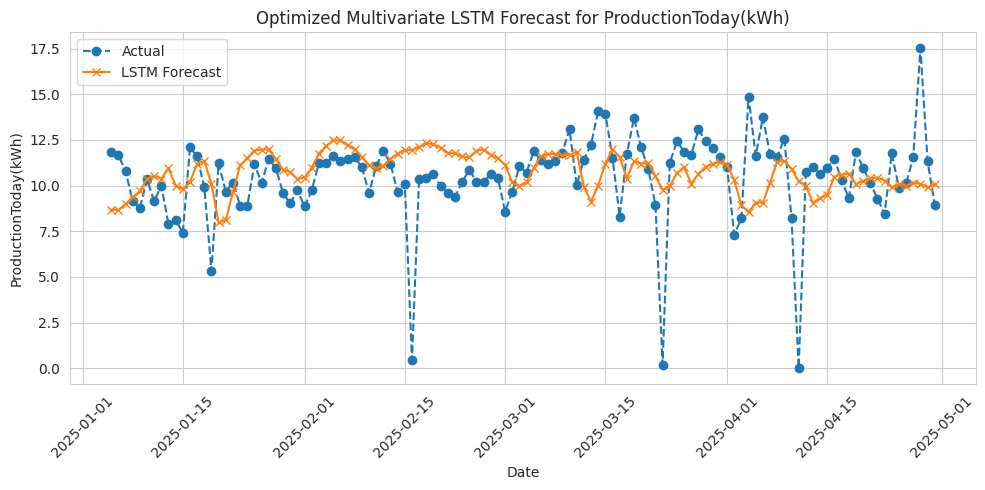

In [ ]:
!pip install keras-tuner --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_excel("MERGE_DATASET_CLEANED.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define target and features
target_col = 'ProductionToday(kWh)'
feature_cols = [
    'SolarRadiation(ALLSKY_SFC_SW_DWN)', 'Temperature(T2M)', 'Humidity(RH2M)',
    'Precipitation', 'Wind(WS10M)'
]

# Ensure all data is numeric
df[feature_cols + [target_col]] = df[feature_cols + [target_col]].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=feature_cols + [target_col], inplace=True)

# Sequence length
SEQUENCE_LENGTH = 30

# Normalize features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(df[feature_cols])
scaled_target = target_scaler.fit_transform(df[[target_col]])

# Combine into one dataset for sequencing
data_combined = np.hstack((scaled_features, scaled_target))

# Create multivariate sequences
def create_multivariate_sequences(data, seq_length=SEQUENCE_LENGTH, target_index=-1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # All features
        y.append(data[i+seq_length, target_index])  # Target at t+1
    return np.array(X), np.array(y)

X, y = create_multivariate_sequences(data_combined)

# Train-test split
train_size = int(len(X) * 0.85)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build model for tuner
def build_model(hp):
    model = Sequential([
        LSTM(
            units=hp.Int('units', 50, 200, step=50),
            return_sequences=True,
            input_shape=(SEQUENCE_LENGTH, X_train.shape[2])
        ),
        Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)),
        LSTM(units=hp.Int('units2', 50, 150, step=50), return_sequences=True),
        Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)),
        LSTM(units=hp.Int('units3', 50, 100, step=50)),
        Dense(1)
    ])

    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    )

    return model

# Tuner setup
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='multivariate_lstm_forecast'
)

# Start tuning
tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Retrieve best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print("\nBest Hyperparameters Found:")
print(f"LSTM Units 1: {best_hps.get('units')}")
print(f"LSTM Units 2: {best_hps.get('units2')}")
print(f"LSTM Units 3: {best_hps.get('units3')}")
print(f"Dropout Rate 1: {best_hps.get('dropout')}")
print(f"Dropout Rate 2: {best_hps.get('dropout2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Train model with best parameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Forecast
lstm_forecast_scaled = best_model.predict(X_test)
lstm_forecast = target_scaler.inverse_transform(lstm_forecast_scaled)
actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
rmse = np.sqrt(mean_squared_error(actual, lstm_forecast))
mae = mean_absolute_error(actual, lstm_forecast)

print(f"\nFinal Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot
plot_dates = df.index[-len(actual):]

plt.figure(figsize=(10, 5))
plt.plot(plot_dates, actual, label="Actual", linestyle='dashed', marker='o')
plt.plot(plot_dates, lstm_forecast, label="LSTM Forecast", marker='x')
plt.xlabel("Date")
plt.ylabel(target_col)
plt.xticks(rotation=45)
plt.legend()
plt.title(f"Optimized Multivariate LSTM Forecast for {target_col}")
plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 80)         │        57,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        26,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379,715 (1.45 MB)

 Trainable params: 126,571 (494.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,144 (988.85 KB)

**Lower RMSE and MAE values indicate better model accuracy.**

**Comparing Model Performance Across Features**

| Variable          | LSTM RMSE (MAE) | Prophet RMSE (MAE) | ARIMA RMSE (MAE) | Best Model | Reason                                                                                  |
| ----------------- | --------------- | ------------------ | ---------------- | ---------- | --------------------------------------------------------------------------------------- |
| Solar Radiation   | 0.806 (0.718)   | 0.977 (0.704)      | 0.942 (0.696)    | LSTM       | Captures complex temporal dependencies and nonlinear patterns better than others.       |
| Temperature       | 0.575 (0.443)   | 1.177 (1.043)      | 1.139 (0.955)    | LSTM       | Effectively models nonlinear trends and temporal dynamics in temperature data.          |
| Humidity          | 6.093 (4.435)   | 4.122 (3.576)      | 9.444 (9.022)    | Prophet    | Better handles seasonality and trend components that dominate humidity patterns.        |
| Precipitation     | 2.556 (1.591)   | 5.104 (3.637)      | 4.742 (3.269)    | LSTM       | Captures irregular precipitation patterns with temporal dependencies more effectively.  |
| Wind              | 0.377 (0.285)   | 0.533 (0.508)      | 0.431 (0.396)    | LSTM       | Models subtle nonlinearities and short-term fluctuations better than ARIMA and Prophet. |
| Energy Production | 2.691 (1.927)   | 3.006 (1.991)      | 2.826 (1.757)    | LSTM       | Learns complex temporal patterns in energy output related to environmental variables.   |

--

** => Insights from RMSE & MAE Comparisons**
1. LSTM

    * generally outperforms ARIMA and Prophet in most features

    * Best model for 5 out of 6 features (Solar Radiation, Temperature, Precipitation, Wind, Energy Production).

    * Handles nonlinear trends well, explaining lower errors.

2. Prophet is best for Humidity

    * Lower RMSE & MAE for Humidity (4.122 RMSE vs. 6.093 for LSTM, 9.444 for ARIMA).

    * Captures seasonality and trend shifts better in this case.

3. ARIMA

    * It struggles with complex features like Humidity & Precipitation

    * Highest errors for Humidity (9.444 RMSE) and Precipitation (4.742 RMSE).

    * Works better for short-term dependencies but not long-term trends.

# **Summary:**

#  LSTM is the most consistent performer across all features.
#  Prophet excels in trend-sensitive features (Humidity).
#  ARIMA has the highest errors overall, especially in highly dynamic features.